<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3. Математика для data sciense. Нетология.

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
a = np.array([[2,1,1], [1,3,2],[1,0,0]])
b = np.array([4,5,6])
x = np.linalg.solve(a, b)
x


array([  6.,  15., -23.])

In [5]:
np.allclose(np.dot(a, x), b)

True

Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

In [6]:
y=20+0.25*x
y=40+0.08*x

In [7]:
a = np.array([[1,-0.25], [1,-0.08]])
b = np.array([20,40])
x = np.linalg.solve(a, b)
x


array([ 49.41176471, 117.64705882])

Точка пересечения прямых - [ 49.4, 117.6], это значит, что почти без разницы какой тариф использовать.
построим график

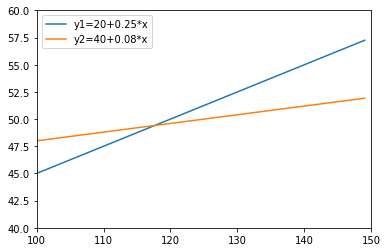

In [8]:
x = np.arange(100, 150)
y1=20+0.25*x
y2=40+0.08*x

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(100, 150)
plt.ylim(40, 60)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.legend(['y1=20+0.25*x','y2=40+0.08*x'])
plt.show()
plt.close()

In [9]:
x=117
y1=20+0.25*x
y2=40+0.08*x

In [10]:
print("за первый тариф Анна потратит: ",y1)
print("за второй тариф Анна потратит: ",y2)
print('Вывод: до 118 минуты следует использовать первый тариф, а после - второй')

за первый тариф Анна потратит:  49.25
за второй тариф Анна потратит:  49.36
Вывод: до 118 минуты следует использовать первый тариф, а после - второй


Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [12]:
X = boston["data"]
names = boston["feature_names"]

In [13]:
data=pd.DataFrame(boston["data"],columns=boston["feature_names"])

In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2
x3 = boston.data[2] # дом 3

In [16]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

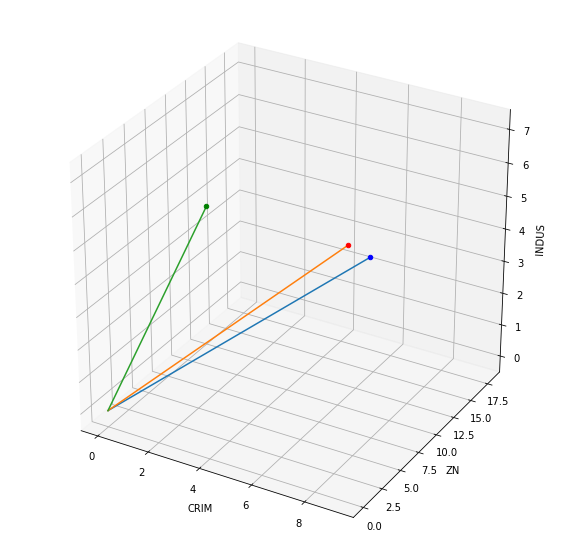

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(data['LSTAT'])
y = np.array(data['ZN'])
z = np.array(data['INDUS'])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
ax.plot([0,x[2]], [0,y[2]], [0,z[2]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')
ax.scatter(x[2], y[2], z[2], c='g', marker='o')

ax.set_xlabel('CRIM')
ax.set_ylabel('ZN')
ax.set_zlabel('INDUS')

plt.show()

In [18]:
data.loc[0,['LSTAT','ZN','INDUS']]

LSTAT     4.98
ZN       18.00
INDUS     2.31
Name: 0, dtype: float64

In [19]:
a = np.array(data.loc[0,['LSTAT','ZN','INDUS']])
b = np.array(data.loc[1,['LSTAT','ZN','INDUS']])
d = np.array(data.loc[2,['LSTAT','ZN','INDUS']])

a = np.transpose([a])
b = np.transpose([b])
d = np.transpose([d])

c = np.hstack((a,b,d))
print(c)

print(np.linalg.det(c))

[[ 4.98  9.14  4.03]
 [18.    0.    0.  ]
 [ 2.31  7.07  7.07]]
-650.2986000000001


In [20]:
"""a = np.array(data.loc[0,['LSTAT','ZN']])
b = np.array(data.loc[1,['LSTAT','ZN']])
a = np.transpose([a])
b = np.transpose([b])"""

"a = np.array(data.loc[0,['LSTAT','ZN']])\nb = np.array(data.loc[1,['LSTAT','ZN']])\na = np.transpose([a])\nb = np.transpose([b])"

определитель не равен 0, значит не комплонарны


Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [21]:
A = c
A

array([[ 4.98,  9.14,  4.03],
       [18.  ,  0.  ,  0.  ],
       [ 2.31,  7.07,  7.07]])

In [22]:
from numpy import linalg as LA


e_vals, e_vecs = LA.eig(A)
print('Исходная матрица: \n', A)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4.98  9.14  4.03]
 [18.    0.    0.  ]
 [ 2.31  7.07  7.07]]
Собственные вектора: 
 [[-0.44804157  0.59721033 -0.08351748]
 [ 0.84347315  0.60433607 -0.39316777]
 [-0.29633054  0.52736869  0.91566584]]
Собственные значения:  [-9.56135732 17.78776157  3.82359576]


In [23]:
v = np.array([e_vecs[0][1],e_vecs[1][1],e_vecs[2][1]])
v_=e_vals[0]*(v)

In [25]:
Av = A.dot(v)

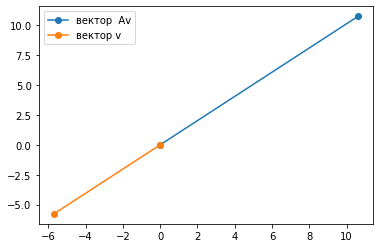

In [27]:
plt.plot([0,Av[0]],[0,Av[1]], '-o')
plt.plot([0,v_[0]], [0,v_[1]], '-o')
plt.legend(['вектор  Av', 'вектор v'])

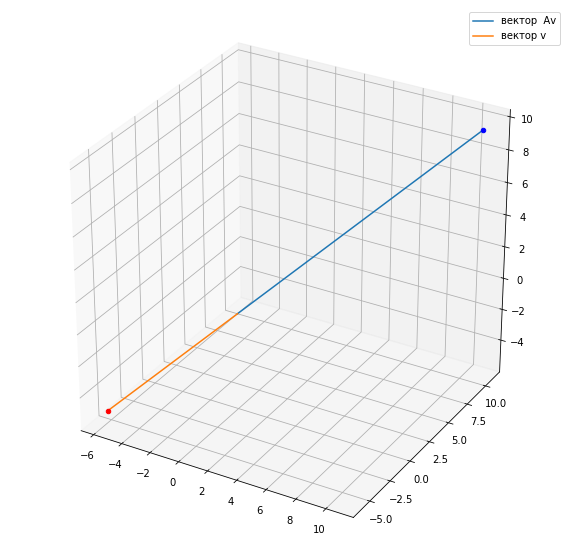

In [36]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot([0,Av[0]], [0,Av[1]], [0,Av[2]])
ax.plot([0,v_[0]], [0,v_[1]], [0,v_[2]])

ax.scatter(Av[0], Av[1], Av[2], c='b', marker='o')
ax.scatter(v_[0], v_[1], v_[2], c='r', marker='o')
plt.legend(['вектор  Av', 'вектор v'])
plt.show()

Ответ: В два раза

Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

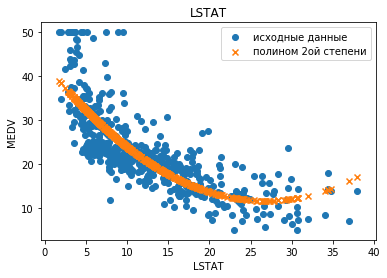

In [31]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

In [32]:
import scipy.integrate as spint
def f(x):
    return model.predict(poly.fit_transform(np.array(x).reshape(-1, 1)))
a = x.min()
b = x.max()
print(spint.quad(f,a,b))

(669.7131464908374, 7.43530955128288e-12)
